**PROBLEM STATEMENT:-**

SuperStore is a global retail company. The Marketing Department wants to run marketing campaigns during the Christmas and New Year holidays to thank customers for their past support of the company. In addition, potential customers can be upgraded to become loyal customers.

The Marketing Director also proposed a plan to use the RFM model in Python to segment customers and then launch appropriate marketing campaigns. Analyze the current situation of the company and give suggestions to the Marketing team.

With the retail model of Superstore company, which indicator should be most focused on in the 3 indicators R, F, and M?


**RFM MODEL:-**

The RFM model is a widely used customer segmentation technique in marketing that stands for Recency, Frequency, and Monetary Value. It is based on the idea that understanding a customer's recent purchasing behavior, how frequently they make purchases, and the monetary value of those purchases can help businesses tailor their marketing strategies more effectively. Here's a breakdown of each component:

Recency (R):

Definition: How recently a customer has made a purchase.
Use: Identifying customers who have recently made a purchase helps to gauge their current engagement and activity level. Recent customers may be more responsive to promotions or campaigns.

Frequency (F):

Definition: How often a customer makes a purchase within a specific time frame.
Use: This helps identify loyal and repeat customers. Customers who make frequent purchases are often more valuable and may be good candidates for loyalty programs or exclusive offers.

Monetary Value (M):

Definition: The total monetary value of a customer's purchases within a specific time frame.
Use: It helps identify high-value customers. These customers may be targeted with special offers or premium services to encourage them to continue making high-value purchases.

RFM analysis numerically ranks a customer in each of these three categories, generally on a scale of 1 to 5 (the higher the number, the better the result). The “best” customer would receive a top score in every category.


**DATASET:-**

Dataset includes 4 different related tables including: transactions information, products information, returned orders of customers purchasing products from 2014 to 2017 and RFM classification.


In [1]:
# importing all the necesary libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import squarify as sq


In [2]:
# Reading the data in dataframe

orders = pd.read_excel("dataset.xlsx",sheet_name='Orders')
returned = pd.read_excel("dataset.xlsx",sheet_name='Return')
segmentation = pd.read_excel("dataset.xlsx",sheet_name='Segmentation')
product = pd.read_excel("dataset.xlsx",sheet_name='Product')

****DATA CLEANING****

In [3]:
# Understanding orders dataframe

orders.info()
orders.head(5)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Row ID       9994 non-null   int64         
 1   Order ID     9994 non-null   object        
 2   Order Date   9994 non-null   datetime64[ns]
 3   Ship Date    9994 non-null   datetime64[ns]
 4   Ship Mode    9994 non-null   object        
 5   Customer ID  9994 non-null   object        
 6   Channel      9994 non-null   object        
 7   Postal Code  9994 non-null   int64         
 8   Product ID   9994 non-null   object        
 9   Sales        9994 non-null   float64       
 10  Quantity     9994 non-null   int64         
 11  Unit Cost    9994 non-null   float64       
dtypes: datetime64[ns](2), float64(2), int64(3), object(5)
memory usage: 937.1+ KB


,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Channel,Postal Code,Product ID,Sales,Quantity,Unit Cost
0,646,CA-2017-126221,2017-12-30,2018-01-05,Standard Class,CC-12430,Home Office,47201,OFF-AP-10002457,209.300,2,76.3945
1,907,CA-2017-143259,2017-12-30,2018-01-03,Standard Class,PO-18865,Consumer,10009,FUR-BO-10003441,323.136,4,77.7546
2,908,CA-2017-143259,2017-12-30,2018-01-03,Standard Class,PO-18865,Consumer,10009,TEC-PH-10004774,90.930,7,12.6003
3,909,CA-2017-143259,2017-12-30,2018-01-03,Standard Class,PO-18865,Consumer,10009,OFF-BI-10003684,52.776,3,10.9950
4,1297,CA-2017-115427,2017-12-30,2018-01-03,Standard Class,EB-13975,Corporate,94533,OFF-BI-10002103,13.904,2,4.6926


In [4]:
# Data cleaning 

# checking for missing values

print ( orders.isnull().sum() )

# checking for duplicate records

print ( orders.duplicated().sum() )

# check if all the order_id are unique

orders['Order ID'].is_unique

Row ID         0
Order ID       0
Order Date     0
Ship Date      0
Ship Mode      0
Customer ID    0
Channel        0
Postal Code    0
Product ID     0
Sales          0
Quantity       0
Unit Cost      0
dtype: int64
0


False

No missing values or duplicate records.
**Orders ID** aren't unique - so we have to keep the distinct id's only in the dataframe. 

In [5]:
# Understanding returned dataframe

returned.info()
returned.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 296 entries, 0 to 295
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Returned  296 non-null    object
 1   Order ID  296 non-null    object
dtypes: object(2)
memory usage: 4.8+ KB


,Returned,Order ID
0,Yes,CA-2017-153822
1,Yes,CA-2017-129707
2,Yes,CA-2014-152345
3,Yes,CA-2015-156440
4,Yes,US-2017-155999


In [6]:
# Data cleaning 

# duplicate records

print ( returned.duplicated().sum() )

# check if order_id are unqiue

print ( returned['Order ID'].is_unique )

# check for missing data

returned.isnull().sum()

0
True


Returned    0
Order ID    0
dtype: int64

No duplicate records found.
No missing data in records.
All the **order's id** are unique.

In [7]:
# Understanding segmentation dataframe

segmentation.info()
segmentation

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11 entries, 0 to 10
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Segment    11 non-null     object
 1   RFM Score  11 non-null     object
dtypes: object(2)
memory usage: 308.0+ bytes


,Segment,RFM Score
0,Champions,"555, 554, 544, 545, 454, 455, 445"
1,Loyal,"543, 444, 435, 355, 354, 345, 344, 335"
2,Potential Loyalist,"553, 551, 552, 541, 542, 533, 532, 531, 452, 4..."
3,New Customers,"512, 511, 422, 421, 412, 411, 311"
4,Promising,"525, 524, 523, 522, 521, 515, 514, 513, 425,42..."
5,Need Attention,"535, 534, 443, 434, 343, 334, 325, 324"
6,About To Sleep,"331, 321, 312, 221, 213, 231, 241, 251"
7,At Risk,"255, 254, 245, 244, 253, 252, 243, 242, 235, 2..."
8,Cannot Lose Them,"155, 154, 144, 214,215,115, 114, 113"
9,Hibernating customers,"332, 322, 233, 232, 223, 222, 132, 123, 122, 2..."


In [9]:
# Understanding product dataframe 

product.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1894 entries, 0 to 1893
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Row ID        1894 non-null   int64 
 1   Product ID    1894 non-null   object
 2   Category      1894 non-null   object
 3   Sub-Category  1894 non-null   object
 4   Product Name  1894 non-null   object
dtypes: int64(1), object(4)
memory usage: 74.1+ KB


In [8]:
# Data cleaning 

# duplicate records

print ( product.duplicated().sum() )

# check if order_id are unqiue

print( product['Product ID'].is_unique )

# check for missing data

print ( product.isnull().sum() ) 

0
False
Row ID          0
Product ID      0
Category        0
Sub-Category    0
Product Name    0
dtype: int64


No missing value nor duplicate records.
**Product ID's** aren't unqiue.


**Order ID** and **Product ID** aren't unqiue.


=> Drop 'product name' and then remove duplicate records of Product ID.


=> Maintain Order ID which are distinct and introduce column to specify which are returned and which aren't.

In [11]:
# Filter order id

# Perform left join betweem Order and returned 

orders = orders.merge(returned, how = 'left', on = 'Order ID', indicator = True)

orders = orders.query('_merge== "left_only"')

orders.head(10)

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Channel,Postal Code,Product ID,Sales,Quantity,Unit Cost,Returned,_merge
0,646,CA-2017-126221,2017-12-30,2018-01-05,Standard Class,CC-12430,Home Office,47201,OFF-AP-10002457,209.300,2,76.3945,NaN,left_only
1,907,CA-2017-143259,2017-12-30,2018-01-03,Standard Class,PO-18865,Consumer,10009,FUR-BO-10003441,323.136,4,77.7546,NaN,left_only
2,908,CA-2017-143259,2017-12-30,2018-01-03,Standard Class,PO-18865,Consumer,10009,TEC-PH-10004774,90.930,7,12.6003,NaN,left_only
3,909,CA-2017-143259,2017-12-30,2018-01-03,Standard Class,PO-18865,Consumer,10009,OFF-BI-10003684,52.776,3,10.9950,NaN,left_only
6,5092,CA-2017-156720,2017-12-30,2018-01-03,Standard Class,JM-15580,Consumer,80538,OFF-FA-10003472,3.024,3,1.2096,NaN,left_only
7,1878,CA-2017-118885,2017-12-29,2018-01-02,Standard Class,JG-15160,Consumer,90049,FUR-CH-10002880,393.568,4,109.4611,NaN,left_only
8,1879,CA-2017-118885,2017-12-29,2018-01-02,Standard Class,JG-15160,Consumer,90049,TEC-PH-10002563,302.376,3,93.2326,NaN,left_only
9,2875,US-2017-102638,2017-12-29,2017-12-31,First Class,MC-17845,Consumer,10035,OFF-FA-10002988,6.030,3,1.0251,NaN,left_only
10,4240,CA-2017-158673,2017-12-29,2018-01-04,Standard Class,KB-16600,Corporate,49505,OFF-PA-10000994,209.700,2,54.5220,NaN,left_only
11,5132,CA-2017-146626,2017-12-29,2018-01-05,Standard Class,BP-11185,Corporate,92804,FUR-FU-10002501,101.120,8,7.9632,NaN,left_only


In [10]:
product 

,Row ID,Product ID,Category,Sub-Category,Product Name
0,1,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase
1,2,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,..."
2,3,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...
3,4,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table
4,5,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System
...,...,...,...,...,...
1889,1890,TEC-PH-10002817,Technology,Phones,RCA ViSYS 25425RE1 Corded phone
1890,1891,TEC-MA-10003589,Technology,Machines,Cisco 8961 IP Phone Charcoal
1891,1892,OFF-AP-10003099,Office Supplies,Appliances,"Eureka Hand Vacuum, Bagless"
1892,1893,TEC-PH-10002645,Technology,Phones,LG G2


In [12]:
# Drop 'product name' and then remove duplicate records of Product ID.

product.drop(['Product Name','Row ID'],axis = 1,inplace = True)
product.drop_duplicates(inplace=True)
product.head()

,Product ID,Category,Sub-Category
0,FUR-BO-10001798,Furniture,Bookcases
1,FUR-CH-10000454,Furniture,Chairs
2,OFF-LA-10000240,Office Supplies,Labels
3,FUR-TA-10000577,Furniture,Tables
4,OFF-ST-10000760,Office Supplies,Storage


**Order ID** and **Product ID** are now unique and distinct.

****RFM SEGMENTATION****

In [13]:
# segmentation splitting in single row

# rename columns
segmentation.columns = ['segment','rfm_score']         

# convert values in 'rfm_score' column into list
segmentation['rfm_score'] = segmentation['rfm_score'].str.split(',')

# split each RFM score into single rows
segmentation = segmentation.explode('rfm_score')   

# strip 'rfm_score' column
segmentation['rfm_score'] = segmentation['rfm_score'].str.strip() 

segmentation.head(5)


,segment,rfm_score
0,Champions,555
0,Champions,554
0,Champions,544
0,Champions,545
0,Champions,454


In [14]:
# check if rfm_score column is unique
segmentation['rfm_score'].is_unique

True

Calculation of Recency involves finding the difference in days between the latest date (latest_date) and the maximum order date (x.max()) for each customer. The result is the number of days since the customer's most recent order. 

In [15]:
# Caculate Recency, Frequency, Monetory

latest_date = orders['Order Date'].max()
print(latest_date)

rfm = orders.groupby('Customer ID').agg(
    Recency = ('Order Date', lambda x: (latest_date - x.max()).days), 
    Frequency = ('Order ID', 'count'), 
    Monetary = ('Sales', 'sum') 
)

rfm

2017-12-30 00:00:00


,Recency,Frequency,Monetary
Customer ID,,,
AA-10315,184,11,5563.560
AA-10375,19,15,1056.390
AA-10480,259,12,1790.512
AA-10645,482,17,5073.975
AB-10015,415,6,886.156
...,...,...,...
XP-21865,82,25,2110.726
YC-21895,4,7,5438.650
YS-21880,9,12,6720.444


In [16]:
# Get R, F, M score using qcut

lab_des=[5,4,3,2,1]
lab_asc=[1,2,3,4,5]

rfm['r'] = pd.qcut(rfm['Recency'], q=5, labels=lab_des)
rfm['f'] = pd.qcut(rfm['Frequency'], q=5, labels=lab_asc)
rfm['m'] = pd.qcut(rfm['Monetary'], q=5, labels=lab_asc)

# concatenate R, F, M score into RFM score
rfm['rfm_score'] = rfm['r'].astype(str) + rfm['f'].astype(str) + rfm['m'].astype(str)
rfm.reset_index(inplace = True)
rfm.head(5)

,Customer ID,Recency,Frequency,Monetary,r,f,m,rfm_score
0,AA-10315,184,11,5563.560,2,3,5,235
1,AA-10375,19,15,1056.390,5,4,2,542
2,AA-10480,259,12,1790.512,2,3,3,233
3,AA-10645,482,17,5073.975,1,5,5,155
4,AB-10015,415,6,886.156,1,1,2,112


In [17]:
# Assign segmentation for each customer_id

cus_segmentation = rfm.merge(segmentation, on ='rfm_score', how = 'left')
cus_segmentation.head(5)

,Customer ID,Recency,Frequency,Monetary,r,f,m,rfm_score,segment
0,AA-10315,184,11,5563.560,2,3,5,235,At Risk
1,AA-10375,19,15,1056.390,5,4,2,542,Potential Loyalist
2,AA-10480,259,12,1790.512,2,3,3,233,Hibernating customers
3,AA-10645,482,17,5073.975,1,5,5,155,Cannot Lose Them
4,AB-10015,415,6,886.156,1,1,2,112,Lost customers


**customer segmentation analysis**

Calculating average recency and frequency along with customer count and total monetary sum for each segment.

calculating and adding columns for customer share and monetary share for each segment.

'cus_share' is calculated as the percentage of customers in each segment out of the total number of customers.

'monetary_share' is calculated as the percentage of total monetary value for each segment out of the overall total monetary value.

In [18]:
# Calculate number of customers share and Monetory share
segmentation_data = cus_segmentation.groupby('segment').agg(cus_count=('Customer ID','count'),
                                                    avg_recency=('Recency','mean'),
                                                    avg_frequency=('Frequency','mean'),
                                                    sum_monetary=('Monetary','sum')).round(1).reset_index()

segmentation_data['cus_share'] = (segmentation_data['cus_count']*100/segmentation_data['cus_count'].sum()).round(2)
segmentation_data['monetary_share'] = (segmentation_data['sum_monetary']*100/segmentation_data['sum_monetary'].sum()).round(2)

segmentation_data.sort_values(by='cus_count',inplace=True)
segmentation_data

,segment,cus_count,avg_recency,avg_frequency,sum_monetary,cus_share,monetary_share
2,Cannot Lose Them,32,513.1,12.0,111892.2,4.05,5.29
0,About To Sleep,38,120.2,8.2,39620.2,4.80,1.87
10,Promising,51,29.8,8.1,134199.7,6.45,6.34
7,Need Attention,56,58.7,11.8,207551.6,7.08,9.81
8,New Customers,68,42.1,5.8,45365.2,8.60,2.14
6,Loyal,74,59.0,16.4,318602.8,9.36,15.05
5,Lost customers,78,549.6,4.9,48605.1,9.86,2.30
3,Champions,95,25.8,19.1,494780.0,12.01,23.38
1,At Risk,97,254.8,14.8,421155.7,12.26,19.90
9,Potential Loyalist,97,43.6,13.2,167511.1,12.26,7.91


****VISUALISATION****

C:\Users\kusha\AppData\Local\Temp\ipykernel_20216\1196479765.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  r_chart = sns.barplot(x='segment',


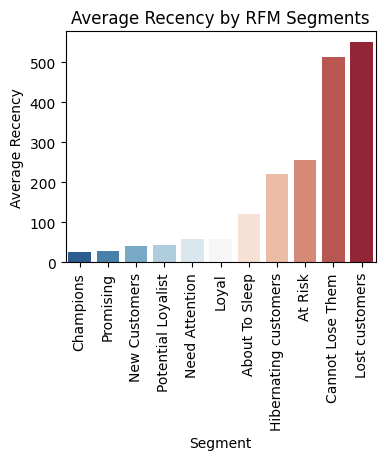

In [19]:
# Color pallete
color = sns.color_palette('RdBu_r',11)

# Average Recency Visualization
fig, ax = plt.subplots(1, figsize = (4,3))
r_chart = sns.barplot(x='segment',
            y='avg_recency',
            data=segmentation_data.sort_values('avg_recency'), palette = color)
r_chart.set_title('Average Recency by RFM Segments')
r_chart.set(xlabel='Segment',
            ylabel='Average Recency')
plt.xticks(rotation=90)
plt.show()

***Comment:***
- Segments with the most recent purchase date: Champions (25.8 days), Promising (29.8 days) and New Customers (42.1 days)
- Segments that have not returned to buy for a long time: Lost customers (549 days) and Cannot Lose Them (513.1 days)

C:\Users\kusha\AppData\Local\Temp\ipykernel_20216\1619308605.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  f_chart =sns.barplot(x='segment',


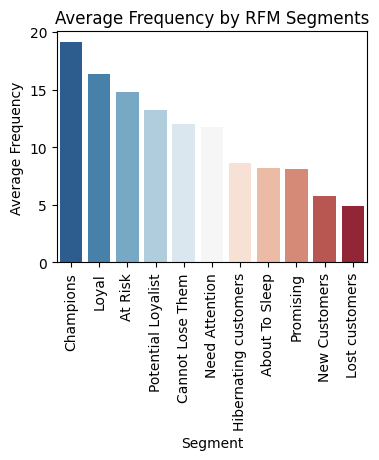

In [20]:
# Average Frequency Visualization

fig, ax = plt.subplots(1, figsize = (4,3))
f_chart =sns.barplot(x='segment',
            y='avg_frequency',
            data=segmentation_data.sort_values('avg_frequency',ascending=False),
            palette=color)
f_chart.set_title('Average Frequency by RFM Segments')
f_chart.set(xlabel='Segment',
            ylabel='Average Frequency')
plt.xticks(rotation=90)
plt.show()

***Comment:***
- Most frequent purchase segments: Champions (19.1x), Loyal (16.4x), At Risk (14.8x)
- Segments with the lowest number of orders: Lost customers (4.9 times), New Customers (5.8 times)
- The number of orders of the Champions segment is 3.3 times higher than that of the Lost customers segment

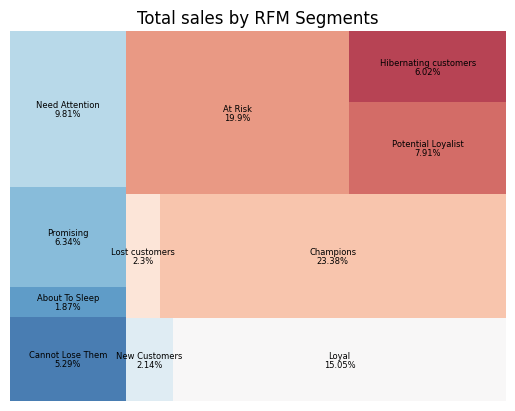

In [21]:
# Visualizing total sales by segments

sales_map = sq.plot(sizes=segmentation_data['monetary_share'], 
                    label=segmentation_data['segment'],
                    color=color,
                    alpha=.8,
                    text_kwargs={'fontsize':6},
                    value=[f'{x}%' for x in segmentation_data['monetary_share']])
plt.title('Total sales by RFM Segments')
plt.axis("off")
plt.show()

***Comment***
- Segments with the highest total revenue: At Risk (421222.62 dollars, equivalent to 19.9%) and Champions ( 494883.66 dollars, equivalent to 23.38%) 
- Segments with low total revenue: New Customers ( 45297.31 dollars, equivalent to 2.14%), About To Sleep (39582.23 dollars, equivalent to 1.87%) 
- The revenue of the At Risk segment is 9.3 times that of the New Customers segment.

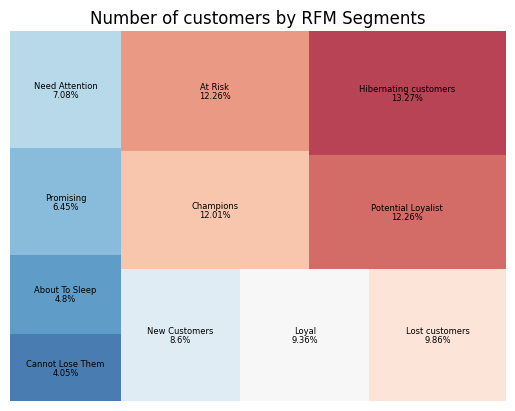

In [22]:
# Visualize Customer count by segments
count_map = sq.plot(sizes=segmentation_data['cus_count'], 
                    label=segmentation_data['segment'],
                    color=color,
                    alpha=.8,
                    text_kwargs={'fontsize':6},
                    value=[f'{x}%' for x in segmentation_data['cus_share']])
plt.title('Number of customers by RFM Segments')
plt.axis("off")
plt.show()

In [23]:
# Describe Recency, Frequency and Monetary

rfm_describe = cus_segmentation[['Recency','Frequency','Monetary']]
rfm_describe.describe()

,Recency,Frequency,Monetary
count,791.000000,791.000000,791.000000
mean,165.073325,11.623262,2675.975452
std,209.322178,5.865554,2513.579432
min,0.000000,1.000000,4.833000
25%,34.000000,7.000000,1042.041500
50%,82.000000,11.000000,2070.779000
75%,200.500000,15.000000,3553.088000
max,1319.000000,34.000000,24516.600000


# 1. Recency, Frequency and Monetory value of Superstore:
- As a retailer, Superstore may prioritize Recency and Frequency over their Monetary since their most loyal shoppers may make many purchases throughout the year at lower Average Transaction Sizes.
- The mean frequency of 11 for a retail store indicates that, on average, each customer makes approximately 11 purchases within the specified time period considered for calculating frequency. 
- Mean of Recency ~ 165 days, while the median is 82 days, this represents a lot of high Recency values. The larger this index, the higher the customer's tendency to leave.

***Those are some warnings for Superstore to focus more on Recency and Frequency performance.***

# 2. Segments of Superstore:
- 3 segments with the highest proportion of customers are Potential Loyalist (12.26%) , At Risk (12.26%) and Hibernating Customers
(13.27%).
- Negative segments such as Hibernating and Lost accounted for a high proportion of customers, 13.27% and 9.86%, respectively. However, these two groups account for less than 7% of revenue.
- The two most positive segments account for less than 22% of the proportion of customers (Champions, 12.01%, and Loyal, 9.36%).
- Potential Loyalist (the ideal segment) has the highest proportion in positive segments (12.26%), but its revenue proportion is only 7.91%. Meanwhile, the negative segment, At Risk, accounts for 19.9% of revenue.

***In this Christmas - New Year marketing campaign, SuperStore needs to prioritize their efforts to promote the Potential Loyalist group to become Loyal and Champions, and find ways to reconnect with customers in the At Risk group.***


***Actionable Tip for each segment***
|Customer Segment         | Activity           | Actionable Tip   |
|:-------------|:-------------|:------|
|Champions   | Bought recently, buy often, and spend the most!|Reward them. Can be early adopters for new products. Will promote your brand. |
|Loyal Customers    | Spend good money with us often. Responsive to promotions.      |   Upsell higher-value products. Ask for reviews. Engage them|
| Potential Loyalist |Recent customers, but spent a good amount and bought more than once    |Offer membership/loyalty program, and recommend other products.|
|Recent Customers |Bought most recently, but not often| Provide onboarding support, give them early success, and start building relationships|
|Promising | Recent shoppers, but haven’t spent much|Create brand awareness, and offer free trials|
| Needing Attention| Above average recency, frequency, and monetary values. May not have bought it very recently though|Make limitedtime offers, and recommend based on past purchases. Reactivate them
| About To Sleep| Below average recency, frequency, and monetary values. Will lose them if not reactivated|Share valuable resources, recommend popular products/renewals at discounts, and reconnect with them |
| At Risk|Spent big money and purchased often. But a long time ago. Need to bring them back!|Send personalized emails to reconnect, offer renewals, and provide helpful resources|
|Can’t Lose Them|Made biggest purchases, and often. But haven’t returned for a long time|Win them back via renewals or newer products, don’t lose them to competition, talk to them |
| Hibernating|Last purchase was long back, with low spenders and a low number of orders |Offer other relevant products and special discounts. Recreate brand value |
| Lost|Lowest recency, frequency, and monetary scores|Revive interest with reach-out campaign, ignore otherwise. |

